### Visualization using matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [19]:
top_10 = (df.groupby('name')['ext price','quantity'].agg({'ext price':'sum','quantity':'count'}).sort_values(by = 'ext price', ascending = False)).iloc[:10,].reset_index()
top_10.rename(columns = {'name':'Name','ext price':'Sales','quantity':'Purchases'},inplace = True)

In [24]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [21]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [32]:
plt.style.use('seaborn-bright')

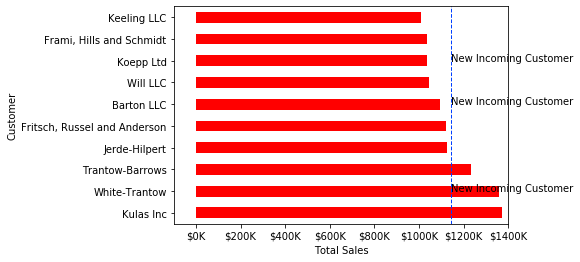

In [41]:
fig, ax = plt.subplots()
top_10.plot(kind = 'barh', y = 'Sales', x = 'Name', color = 'red',ax = ax)
ax.set_xlim([-10000,140000])
ax.set_xlabel('Total Sales')
ax.set_ylabel('Customer')
ax.legend().set_visible(False)

# Change the format in dollar 
def currency(x,pos):
    if x > 1000000:
        return '${0:1.0f}M'.format(x*10e-6)
    else:
        return '${0:1.0f}K'.format(x*10e-3)
    
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
avg = top_10['Sales'].mean()

# Add a vertical line
ax.axvline(x = avg, label = 'Average', linestyle = '--', linewidth = 1)

# Annotation
for customer in [1,5,7]:
    ax.text(avg,customer,"New Incoming Customer")


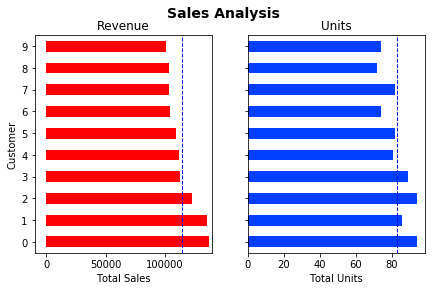

In [43]:
# Plot two graphs
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (7,4),sharey = True)
top_10.plot(kind = 'barh', y = 'Sales', x = 'Name', color = 'red',ax = ax0)
ax0.set_xlim([-10000,140000])
ax0.set(title = 'Revenue', xlabel = 'Total Sales', ylabel = 'Customer')

ax0.axvline(x = avg, color = 'b', label = 'Average', linestyle = '--', linewidth = 1)

# Plot 2
top_10.plot(kind = 'barh', y = 'Purchases', ax = ax1)
ax1.set(title = 'Units', xlabel = 'Total Units')
avg1 = top_10['Purchases'].mean()
ax1.axvline(x = avg1, color = 'b', label = 'Average', linestyle = '--', linewidth = 1)

# Tile the whole pic
fig.suptitle('Sales Analysis', fontsize = 14, fontweight = 'bold')

# Hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [44]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [45]:
# Save the image
fig.savefig('sales.jpg', transparent = False)